<a href="https://colab.research.google.com/github/szm7/AML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [64]:
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv.xls")

In [65]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [66]:
data.drop(['ID'],inplace=True,axis=1)

In [67]:
data.shape

(5000, 13)

In [68]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

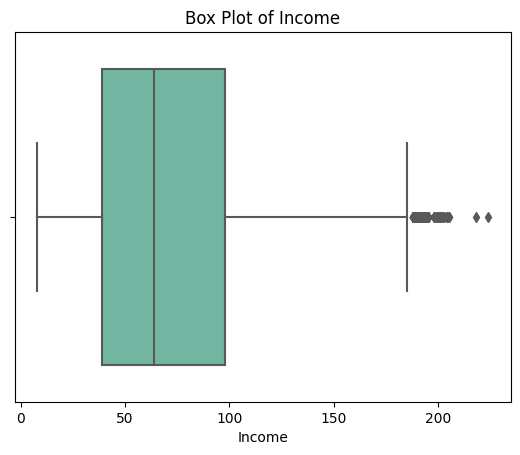

In [69]:
sns.boxplot(x='Income', data=data)
plt.title('Box Plot of Income')
plt.show()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [71]:
category_col = ['Personal Loan', 'Securities Account','Family', 'CD Account', 'Online', 'CreditCard', 'ZIP Code', 'Education']
data[category_col] = data[category_col].astype('category')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


In [86]:
data['Agebin'] = pd.cut(data['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

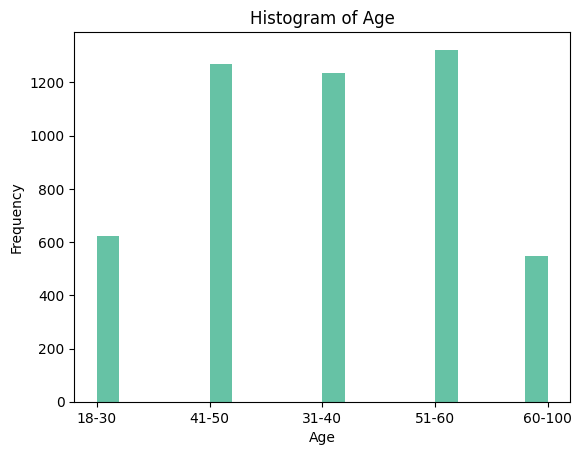

In [88]:
plt.hist(data['Agebin'],bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [90]:
data["Income_group"] = pd.cut(
    x=data["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

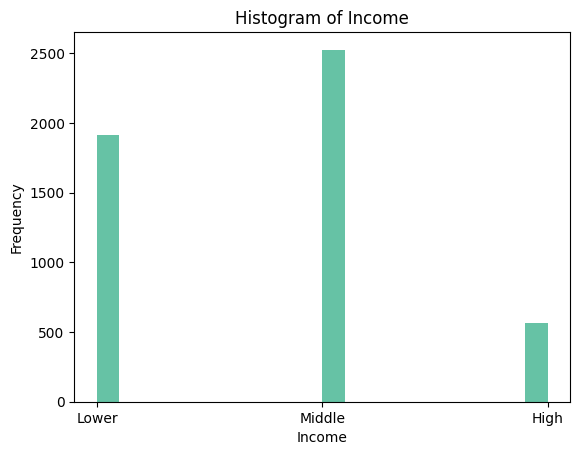

In [91]:
plt.hist(data['Income_group'],bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

In [76]:
data.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [92]:
data["Spending_group"] = pd.cut( x=data["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

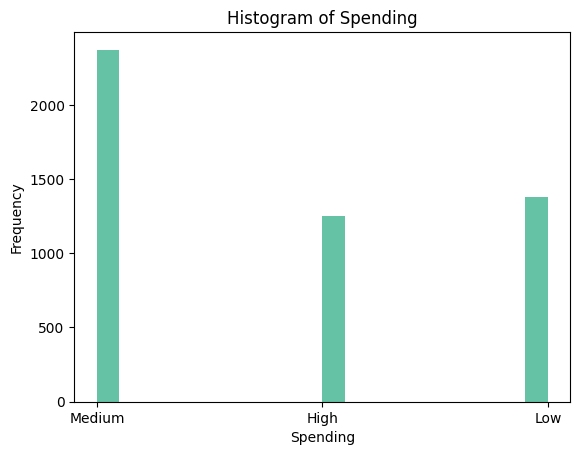

In [93]:
plt.hist(data['Spending_group'],bins=20)
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Spending')
plt.show()

In [78]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Agebin,Income_group,Spending_group
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,18-30,Lower,Medium
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-50,Lower,Medium
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,31-40,Lower,Medium
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-40,Middle,High
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-40,Lower,Medium


<ipython-input-79-704688220065>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


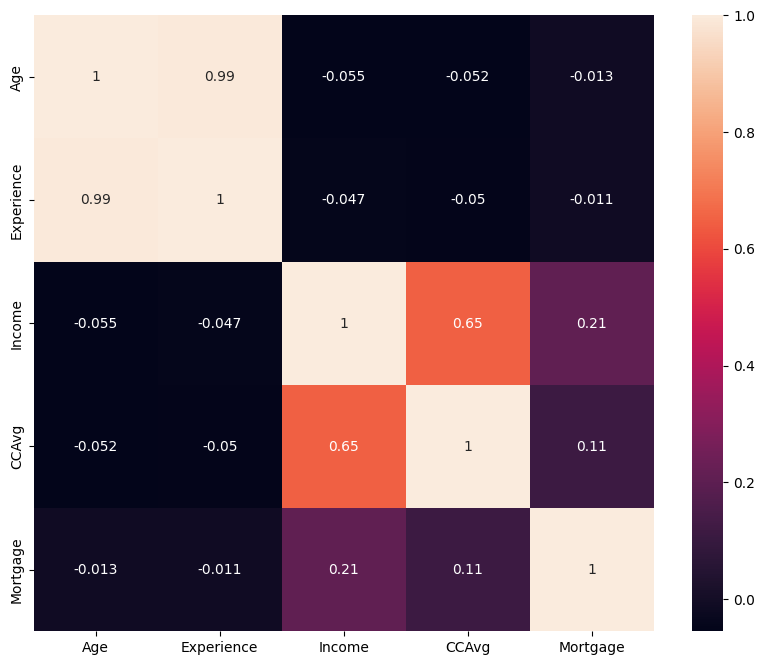

In [79]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [80]:
data.drop(columns=["Agebin", "ZIP Code",'Experience','Income_group','Spending_group'], inplace=True)

In [81]:
x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [84]:
from sklearn.metrics import accuracy_score
y_pred = DT.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.9806666666666667


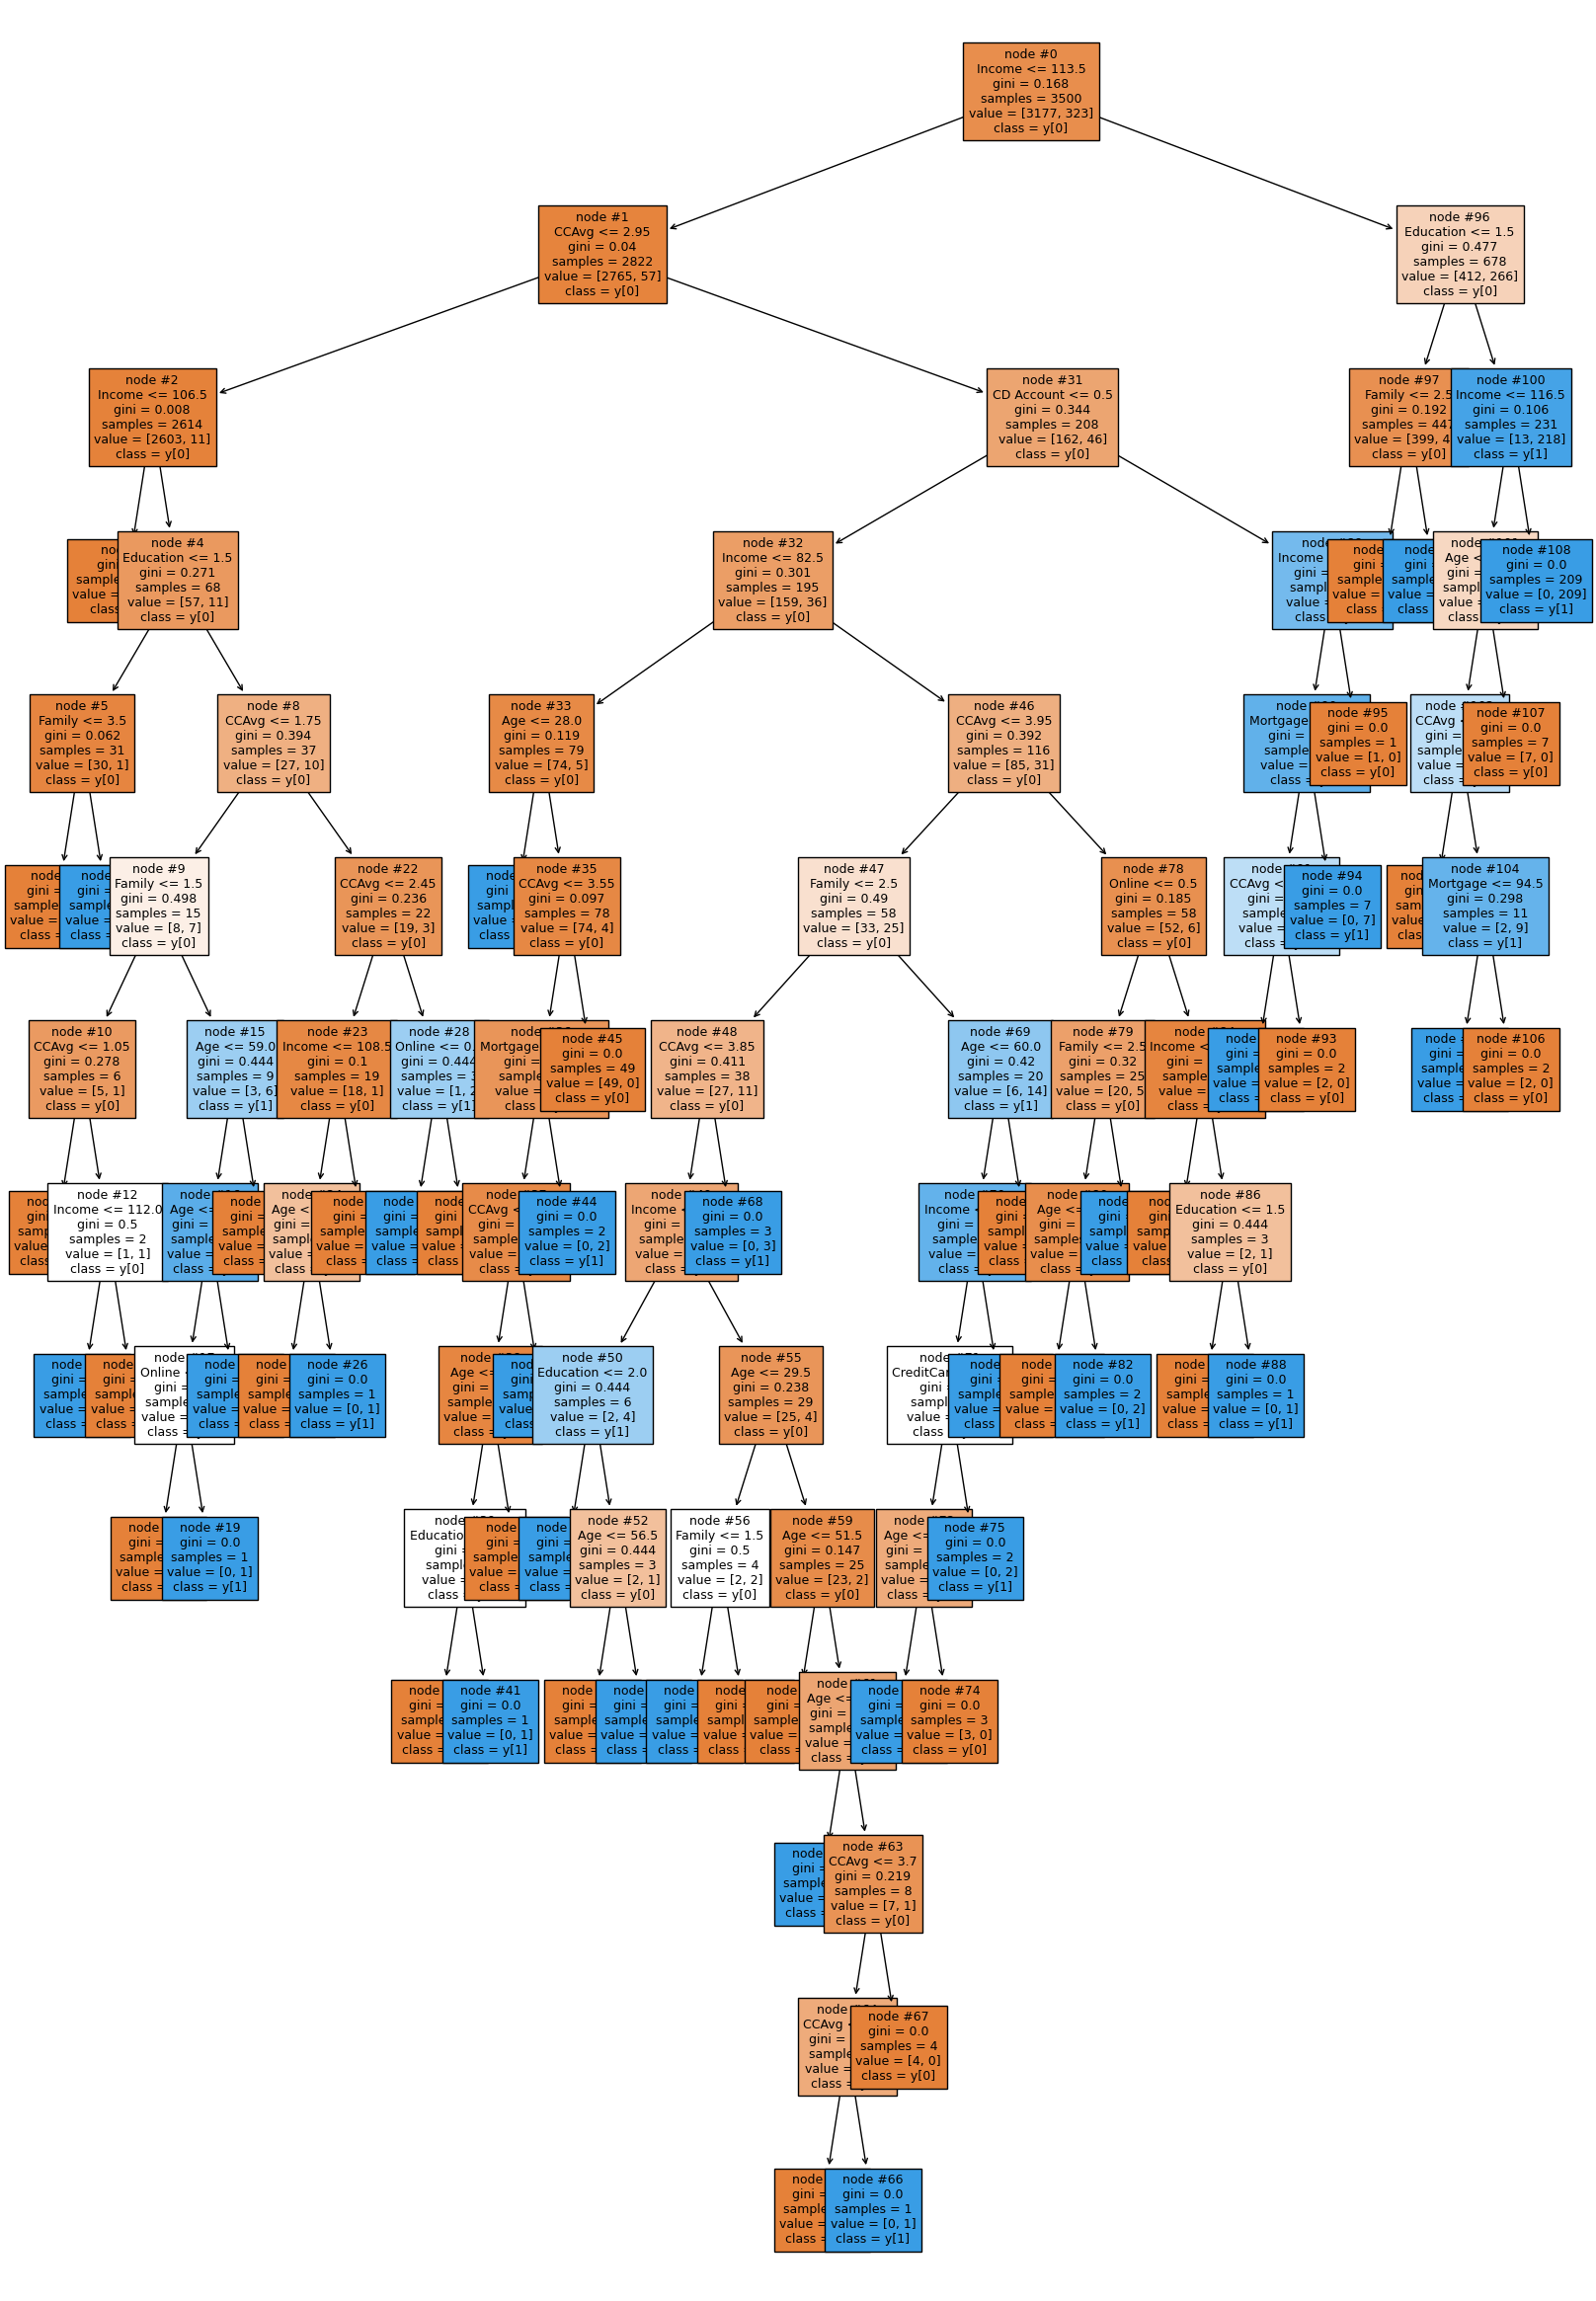

In [85]:
column_names = list(x.columns)
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(DT,feature_names=column_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()